#Desenvolvedores:
 - Vinicius de Oliveira Mendes Lima
 - Deivid Valença de Araujo
 - Roger William Belas Cruz
 - Gustavo Luiz Silva Lima
 - Lucas Ricardo Ribeiro Souza

# 1 - Importar depêndencias

In [38]:
!pip install unidecode
!python -m spacy download pt


#pd.set_option('display.max_colwidth', -1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.2 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [39]:
import pandas as pd
import unidecode as unidecode
import nltk as nltk
import string
import sklearn
from nltk import tokenize
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2, f_classif
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np

In [40]:
from numpy import random

In [41]:
nltk.download('rslp')
nltk.download('stopwords')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Montar o Dataframe
 - Carregar os arquivo em excel com os textos de LGPD e não lgpd
 - Classificar LGPD = 1 e Não LGPD  = 0
 - Concatenar ambos os carregamentos 

In [42]:
uri_data_lgpd ='https://github.com/ViniciusOML/tetris/blob/main/termos_lgpd.xlsx?raw=true'
df_lgpd = pd.read_excel (uri_data_lgpd)
df_lgpd['CLASSE'] = 1

In [43]:
uri_data_nao_lgpd = 'https://github.com/ViniciusOML/tetris/blob/main/termos_nao_lgpd.xlsx?raw=true'
df_nao_lgpd = pd.read_excel(uri_data_nao_lgpd)
df_nao_lgpd['CLASSE'] = 0

In [44]:
#concatena as duas bases em uma variável e deixa a ordenação delas aleatória
df = pd.concat([df_lgpd, df_nao_lgpd], axis=0, ignore_index=True)
df = shuffle(df)

# 2 - Converte cada campo da planilha em uma variável

In [45]:
pd.set_option('display.max_colwidth', 1)
termos = df['TERMO'].fillna("") # Lê a coluna TERMO e passa para a variável termos
y = df['CLASSE']	# Lê a coluna CLASSE do dataframe e passa para a variável y

termos[:10]

101    Confidencialidade e SegurançaTemos o compromisso com o nosso cliente de zelar pela excelência dos serviços prestados e, principalmente, com a segurança de seus dados cadastrais. Por isso, atuamos com tecnologias avançadas e contamos com a competência de diversos profissionais, que prezam pela segurança de todo o nosso sistema, proporcionando a você uma excelente experiência de compra.Trabalhamos com rigorosas políticas de privacidade em todos os nossos processos, garantindo que seus dados cadastrais jamais sejam vendidos, trocados ou divulgados a terceiros, exceto quando isso for condição para algum processo relacionado à entrega, cobrança ou participação em promoções - desde que isto seja solicitado pelo cliente. Nestes casos, seus dados pessoais são fundamentais para que seu pedido chegue com assertividade e segurança no endereço de entrega.Dicas ImportantesPara que seus dados permaneçam intactos, aconselhamos que você não compartilhe suas senhas com terceiros, mesmo que sejam

# Pre-processamento

 - remoção de caput (textos que tem função de cabeçalhos no meio jurídico)
 - remoção de stop words
 - Tokenização



In [46]:

import string 
   
def remove_caput(text):
        
    words = text.split()
    
    sem_caput = []
    for w in words:
        if not w.isupper():
            sem_caput.append(w)
    
    result = ''
    for w in sem_caput:
        result = result + w + ' '
    return result

dispositivos = termos.apply(lambda x: remove_caput(x)) #verbetação + dispositivo
dispositivos.head(1)

101    Confidencialidade e SegurançaTemos o compromisso com o nosso cliente de zelar pela excelência dos serviços prestados e, principalmente, com a segurança de seus dados cadastrais. Por isso, atuamos com tecnologias avançadas e contamos com a competência de diversos profissionais, que prezam pela segurança de todo o nosso sistema, proporcionando a você uma excelente experiência de compra.Trabalhamos com rigorosas políticas de privacidade em todos os nossos processos, garantindo que seus dados cadastrais jamais sejam vendidos, trocados ou divulgados a terceiros, exceto quando isso for condição para algum processo relacionado à entrega, cobrança ou participação em promoções - desde que isto seja solicitado pelo cliente. Nestes casos, seus dados pessoais são fundamentais para que seu pedido chegue com assertividade e segurança no endereço de entrega.Dicas ImportantesPara que seus dados permaneçam intactos, aconselhamos que você não compartilhe suas senhas com terceiros, mesmo que sejam

In [47]:


df['DISPOSITIVOS'] = dispositivos 

In [48]:

df['DISPOSITIVOS'].head(3) 

101    Confidencialidade e SegurançaTemos o compromisso com o nosso cliente de zelar pela excelência dos serviços prestados e, principalmente, com a segurança de seus dados cadastrais. Por isso, atuamos com tecnologias avançadas e contamos com a competência de diversos profissionais, que prezam pela segurança de todo o nosso sistema, proporcionando a você uma excelente experiência de compra.Trabalhamos com rigorosas políticas de privacidade em todos os nossos processos, garantindo que seus dados cadastrais jamais sejam vendidos, trocados ou divulgados a terceiros, exceto quando isso for condição para algum processo relacionado à entrega, cobrança ou participação em promoções - desde que isto seja solicitado pelo cliente. Nestes casos, seus dados pessoais são fundamentais para que seu pedido chegue com assertividade e segurança no endereço de entrega.Dicas ImportantesPara que seus dados permaneçam intactos, aconselhamos que você não compartilhe suas senhas com terceiros, mesmo que sejam

In [49]:
def remover_stopwords(tokenizador, textos):
  stop_words = nltk.corpus.stopwords.words("portuguese")
  termos_processados = list()
  for termos in textos:
    novos_termos = list()
    print(termos)
    palavras_termos = tokenizador.tokenize(termos)
    print(palavras_termos)
    for palavra in palavras_termos:
      if palavra.lower() not in stop_words:        
        novos_termos.append(palavra)
    termos_processados.append(' '.join(novos_termos))
  return termos_processados

In [50]:
dispostivos_proc = [unidecode.unidecode(texto.lower()) for texto in df["DISPOSITIVOS"]]
df["DISPOSITIVOS_PROC"] = dispostivos_proc

In [51]:
stemmer = nltk.RSLPStemmer()
punct_tokenize = tokenize.WordPunctTokenizer()

In [52]:
df['DISPOSITIVOS_PROC'] = remover_stopwords(punct_tokenize, df["DISPOSITIVOS_PROC"])

confidencialidade e segurancatemos o compromisso com o nosso cliente de zelar pela excelencia dos servicos prestados e, principalmente, com a seguranca de seus dados cadastrais. por isso, atuamos com tecnologias avancadas e contamos com a competencia de diversos profissionais, que prezam pela seguranca de todo o nosso sistema, proporcionando a voce uma excelente experiencia de compra.trabalhamos com rigorosas politicas de privacidade em todos os nossos processos, garantindo que seus dados cadastrais jamais sejam vendidos, trocados ou divulgados a terceiros, exceto quando isso for condicao para algum processo relacionado a entrega, cobranca ou participacao em promocoes - desde que isto seja solicitado pelo cliente. nestes casos, seus dados pessoais sao fundamentais para que seu pedido chegue com assertividade e seguranca no endereco de entrega.dicas importantespara que seus dados permanecam intactos, aconselhamos que voce nao compartilhe suas senhas com terceiros, mesmo que sejam amigos

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Geração do bag of words

 - Conjunto das palavras mantendo a frequência.

In [53]:
count_vectorizer = CountVectorizer()

In [54]:
bag_of_words = count_vectorizer.fit_transform(df['DISPOSITIVOS_PROC'])

# Quebrando o conjunto de treino e teste

In [132]:
#Rodar este trecho para alterar a aleatoriedade da amostra seed utilizado no estudo: 605123483
seed_randomico = random.randint (1,999999999)
# Definindo tamanho da amostra que será usada para 80% treino e 20% teste 
X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words,
                                                              df.CLASSE,
                                                              test_size=0.2, 
                                                              random_state = seed_randomico)
#retorno do valor do seed 

print("Valor do seed: ", seed_randomico)


Valor do seed:  605123483


# Modelos


In [56]:
#MultinomialNB

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

#lr = LogisticRegression(solver='lbfgs')
lr = LogisticRegression(solver='liblinear', multi_class='auto',verbose=0) #escolhido solver = liblinear pois segunda a docuemntação essa configuração é a melhor para dataset pequeno

models = [nb,lr]
names = ['NB','Logistic Regression']

# Classificação 

In [57]:
from sklearn.metrics import accuracy_score, recall_score,precision_score,f1_score

In [58]:
def executa_algoritmos(X_treino, y_treino, X_teste, y_teste, bag_of_words, models):
  
  for model in models:
    
    print(model)
    model.fit(X_treino,y_treino)
    print(" Score : ", model.score(X_treino,y_treino))
    y_pred_class =  model.predict(X_teste)
    print(" Accuracy: ", accuracy_score(y_teste, y_pred_class))    
    print(" Precision : ",precision_score(y_teste, y_pred_class, average='macro'))

    target_names = ['ADERENTE', 'NAO ADERENTE']

    print(classification_report(y_teste, y_pred_class, target_names=target_names))
    print("----------------------------------------------------------------------")

  seed = None
  
  # prepare models
  models = []
  models.append(('Naive Bayes.', nb))
  models.append(('Regressão Logistica', lr))
 
  

In [133]:
executa_algoritmos(X_treino, y_treino, X_teste, y_teste, bag_of_words, models) 

MultinomialNB()
 Score :  0.9910714285714286
 Accuracy:  0.9642857142857143
 Precision :  0.9666666666666667
              precision    recall  f1-score   support

    ADERENTE       1.00      0.93      0.96        14
NAO ADERENTE       0.93      1.00      0.97        14

    accuracy                           0.96        28
   macro avg       0.97      0.96      0.96        28
weighted avg       0.97      0.96      0.96        28

----------------------------------------------------------------------
LogisticRegression(solver='liblinear')
 Score :  1.0
 Accuracy:  0.9285714285714286
 Precision :  0.9285714285714286
              precision    recall  f1-score   support

    ADERENTE       0.93      0.93      0.93        14
NAO ADERENTE       0.93      0.93      0.93        14

    accuracy                           0.93        28
   macro avg       0.93      0.93      0.93        28
weighted avg       0.93      0.93      0.93        28

-------------------------------------------------

# Matriz de confusão

MultinomialNB()_modelo
Matriz de confusão não normalizada
[[13  1]
 [ 0 14]]


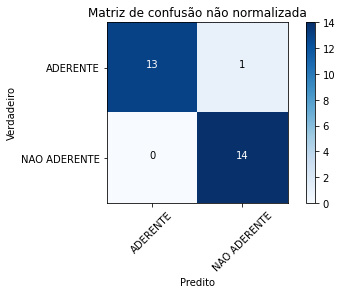

LogisticRegression(solver='liblinear')_modelo
Matriz de confusão não normalizada
[[13  1]
 [ 1 13]]


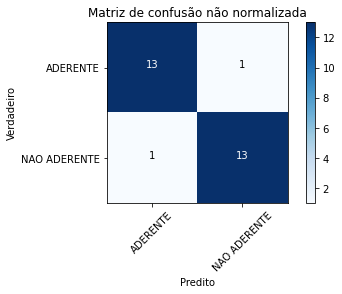

In [134]:
import itertools  
from sklearn.metrics import confusion_matrix

class_names = ['ADERENTE', 'NAO ADERENTE']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='MATRIZ DE CONFUSÃO',
                          cmap=plt.cm.Blues):
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão Normalizada")
    else:
        print('Matriz de confusão não normalizada')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')

for model in models:

    y_pred = model.predict(X_teste)    
    
    print(str(model)+'_modelo')
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_teste, y_pred)
    np.set_printoptions(precision=2)

    # Plot matriz não normalizada
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Matriz de confusão não normalizada')

    #Plot matriz nomalizada
    #plt.figure()
    #plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,
                         #title='Matriz de confusão Normalizada')

    plt.show()